# Correlation Analysis: Real vs Synthetic Data

This notebook compares the correlation structures between real preprocessed data and synthetic data generated using GCopula augmentation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Set style for better visualizations
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Define data paths
base_path = '../data/processed/preprocessed/'
feature_names_path = os.path.join(base_path, 'feature_names.json')

# Load feature names
with open(feature_names_path, 'r') as f:
    feature_names = json.load(f)

print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")

Number of features: 34
Features: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'sg', 'al', 'su', 'rbc_0.0', 'rbc_1.0', 'pc_0.0', 'pc_1.0', 'pcc_0.0', 'pcc_1.0', 'ba_0.0', 'ba_1.0', 'htn_0.0', 'htn_1.0', 'dm_0.0', 'dm_1.0', 'cad_0.0', 'cad_1.0', 'appet_good', 'appet_poor', 'pe_0.0', 'pe_1.0', 'ane_0.0', 'ane_1.0']


In [4]:
# Load real preprocessed data (combining train and test)
X_train_real = pd.read_csv(os.path.join(base_path, 'X_train_preproc.csv'))
X_test_real = pd.read_csv(os.path.join(base_path, 'X_test_preproc.csv'))

# Combine train and test for comprehensive correlation analysis
X_real_combined = pd.concat([X_train_real, X_test_real], ignore_index=True)
X_real_combined.columns = feature_names

print(f"\nReal data shape: {X_real_combined.shape}")
print(f"Real data:\n{X_real_combined.head()}")


Real data shape: (400, 34)
Real data:
        age        bp       bgr        bu        sc       sod       pot  \
0  1.297761  0.228786 -0.375361 -0.285778 -0.636093 -0.025974 -1.151929   
1 -0.231493  0.228786  0.920031 -0.693451 -0.458564  0.428165 -0.423469   
2  1.114250 -1.172208 -0.348373 -0.367313 -0.695269  0.428165  0.450683   
3 -0.904364  1.629780 -0.505432 -0.795369 -0.458564  0.122651 -1.025240   
4 -0.047982  0.228786 -0.699209 -0.876904 -0.488152  1.033683 -0.860545   

       hemo       pcv        wc  ...  dm_0.0  dm_1.0  cad_0.0  cad_1.0  \
0  0.820457  0.786829  0.288806  ...     1.0     0.0      1.0      0.0   
1  0.244747  0.075638  0.793954  ...     0.0     1.0      1.0      0.0   
2  1.252240  0.549765 -1.432835  ...     1.0     0.0      1.0      0.0   
3  0.892421  0.668297 -1.576305  ...     1.0     0.0      1.0      0.0   
4  1.072330  0.905360  0.360541  ...     1.0     0.0      1.0      0.0   

   appet_good  appet_poor  pe_0.0  pe_1.0  ane_0.0  ane_1.0  
0  

In [5]:
# Load synthetic data
X_synth = pd.read_csv('../data/synthetic/X_synth_3x_gcopula_preproc.csv')
X_synth.columns = feature_names

print(f"\nSynthetic data shape: {X_synth.shape}")
print(f"Synthetic data:\n{X_synth.head()}")


Synthetic data shape: (840, 34)
Synthetic data:
        age        bp       bgr        bu        sc       sod       pot  \
0 -0.476173 -0.471711 -0.511519 -0.734219 -0.542811  0.276785  0.596375   
1  0.178739 -0.471711 -0.476909 -0.285778 -0.547328  0.428165  0.797245   
2  0.039334  0.088856 -0.635321 -0.467004 -0.547328  0.966135 -1.006237   
3  1.766681 -1.172208  2.216064  1.065974  3.057522 -1.085632  0.013607   
4  1.420101 -0.471711 -0.685715 -0.680387 -0.695269  0.276785  0.950502   

       hemo       pcv        wc  ...  dm_0.0  dm_1.0  cad_0.0  cad_1.0  \
0  0.532602  1.023892 -1.016646  ...     1.0     0.0      1.0      0.0   
1  1.899914  0.194170 -0.069869  ...     1.0     0.0      1.0      0.0   
2  0.702029  1.828472 -0.966557  ...     1.0     0.0      1.0      0.0   
3 -0.978637 -1.228211 -0.464412  ...     0.0     1.0      1.0      0.0   
4  1.396167  0.808733 -0.787219  ...     1.0     0.0      1.0      0.0   

   appet_good  appet_poor  pe_0.0  pe_1.0  ane_0.0  ane

## Correlation Matrix - Real Data

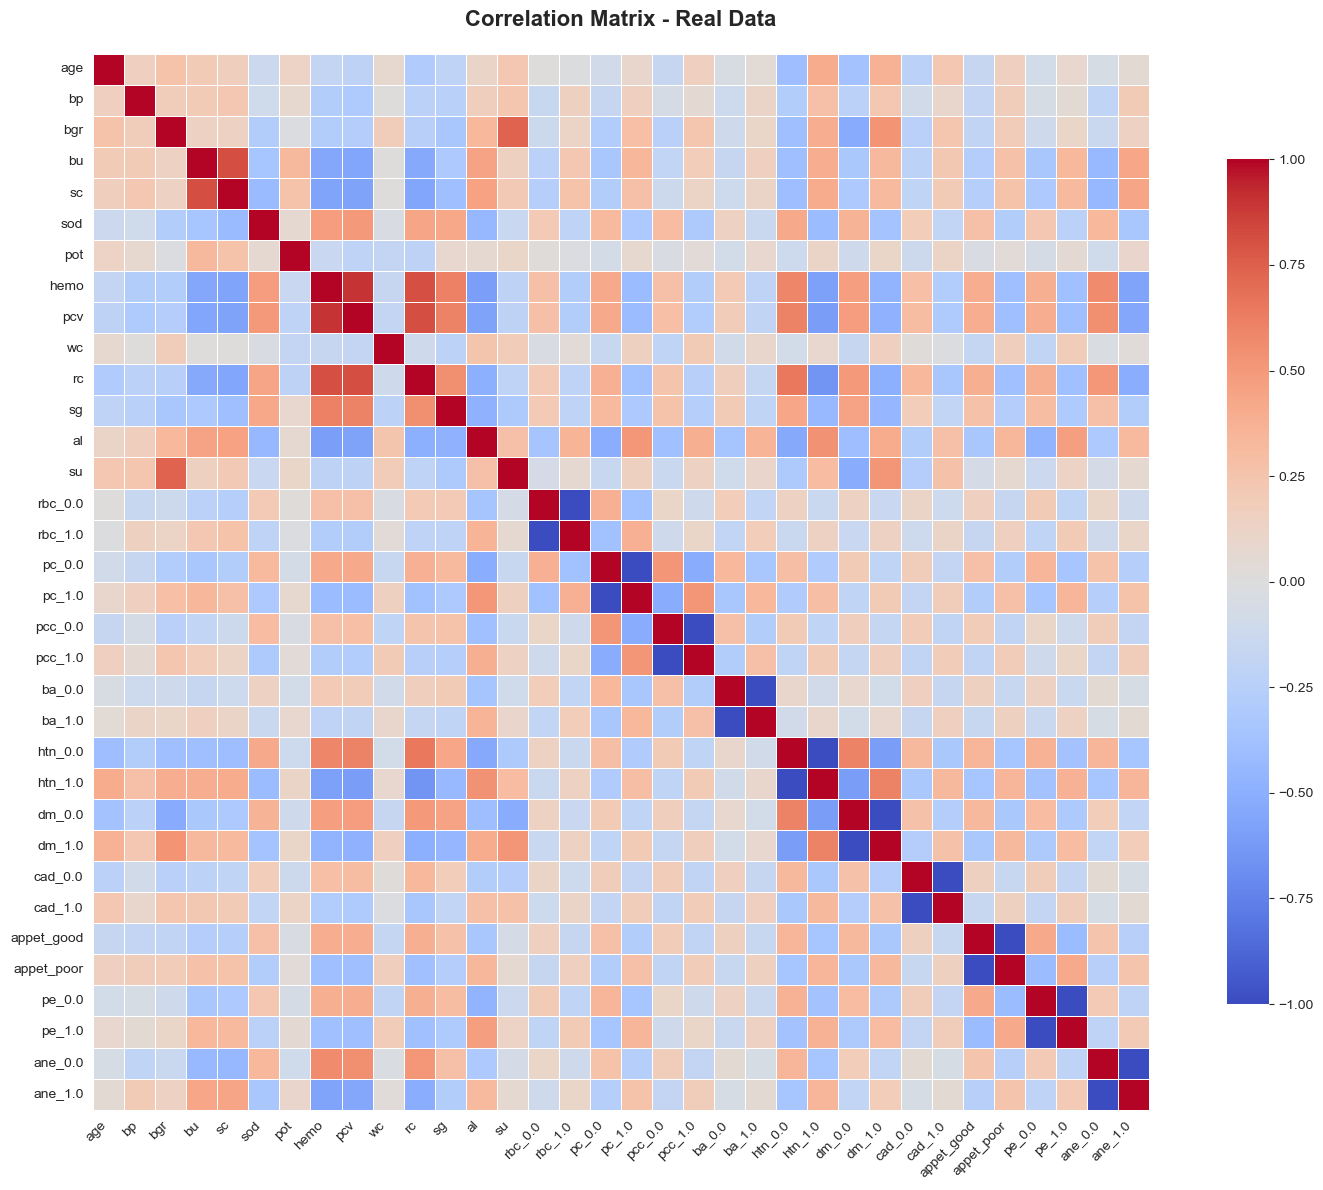

Real data correlation matrix shape: (34, 34)


In [10]:
# Calculate correlation matrices
corr_real = X_real_combined.corr()
corr_synth = X_synth.corr()

# Plot correlation matrix for real data
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_real, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Real Data', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Real data correlation matrix shape: {corr_real.shape}")

## Correlation Matrix - Synthetic Data (GCopula 3x)

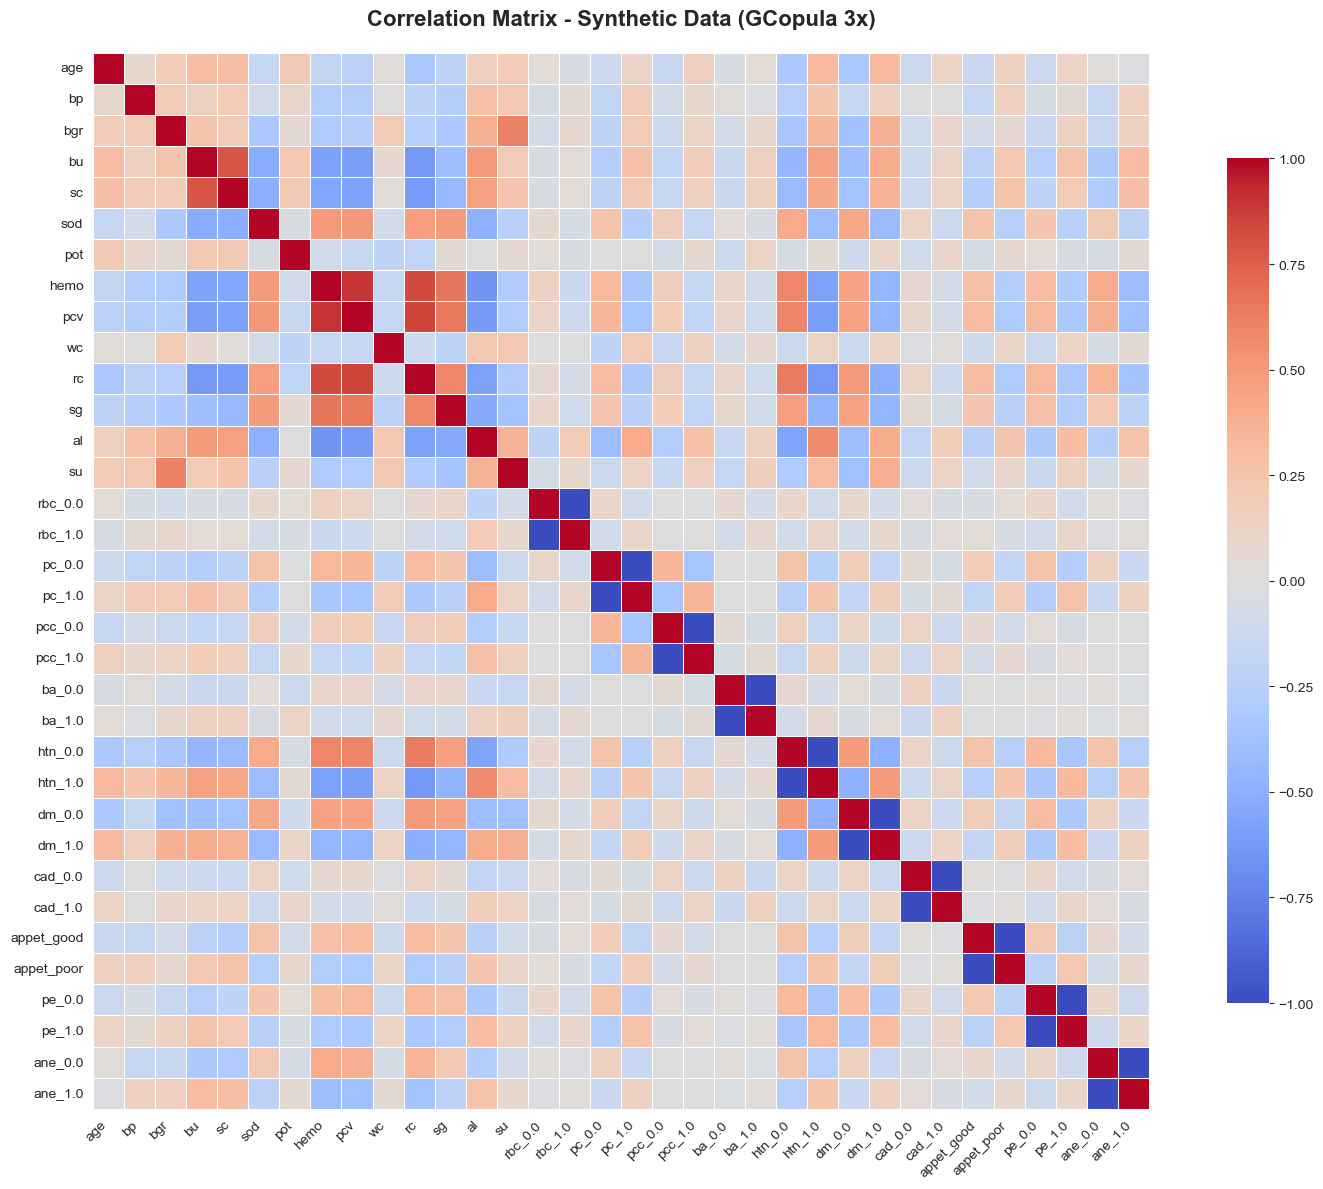

Synthetic data correlation matrix shape: (34, 34)


In [7]:
# Plot correlation matrix for synthetic data
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_synth, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Synthetic Data (GCopula 3x)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Synthetic data correlation matrix shape: {corr_synth.shape}")

## Difference in Correlation Matrices (Real - Synthetic)

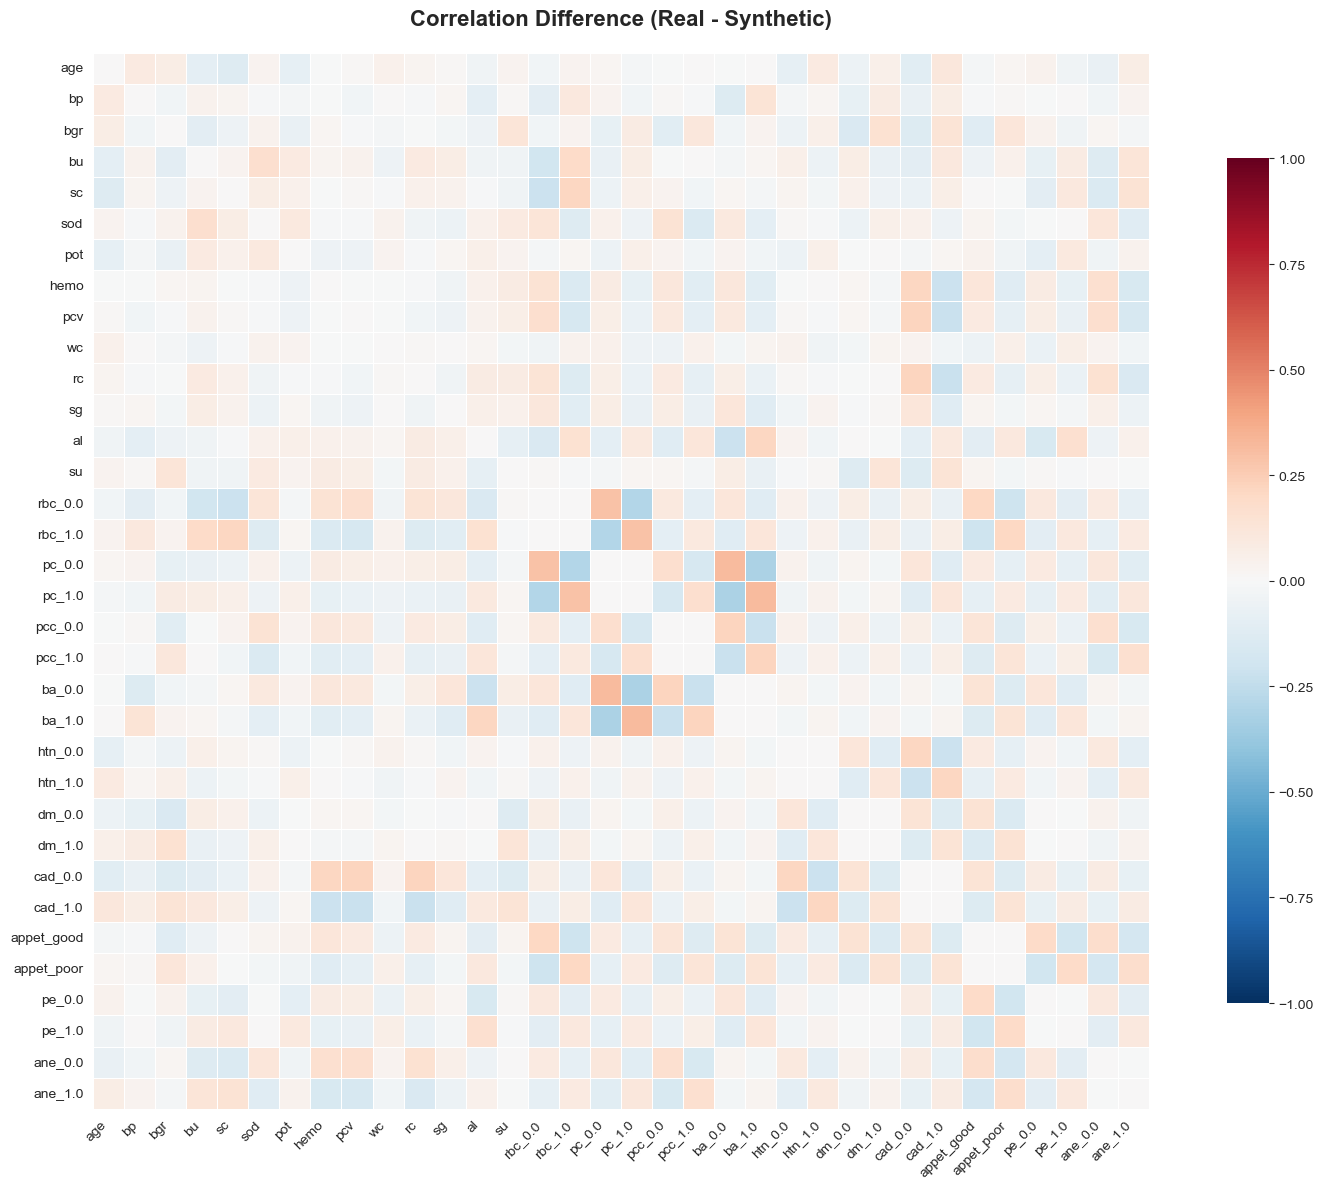

Mean absolute correlation difference: 0.0749
Max correlation difference: 0.3149
Min correlation difference: -0.3149


In [8]:
# Calculate and plot the difference
corr_diff = corr_real - corr_synth

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_diff, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Correlation Difference (Real - Synthetic)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Mean absolute correlation difference: {np.abs(corr_diff).values.mean():.4f}")
print(f"Max correlation difference: {corr_diff.values.max():.4f}")
print(f"Min correlation difference: {corr_diff.values.min():.4f}")

## Statistical Comparison Summary

In [9]:
# Create summary statistics
summary_stats = {
    'Metric': ['Dataset Size', 'Number of Features', 'Mean Correlation', 'Std Dev Correlation', 'Max Correlation', 'Min Correlation'],
    'Real Data': [
        X_real_combined.shape[0],
        X_real_combined.shape[1],
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].mean():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].std():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].max():.4f}",
        f"{corr_real.values[np.triu_indices_from(corr_real.values, k=1)].min():.4f}"
    ],
    'Synthetic Data': [
        X_synth.shape[0],
        X_synth.shape[1],
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].mean():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].std():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].max():.4f}",
        f"{corr_synth.values[np.triu_indices_from(corr_synth.values, k=1)].min():.4f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('../results/correlation_analysis_summary.csv', index=False)
print("\nSummary saved to: ../results/correlation_analysis_summary.csv")

             Metric Real Data Synthetic Data
       Dataset Size       400            840
 Number of Features        34             34
   Mean Correlation   -0.0174        -0.0186
Std Dev Correlation    0.3218         0.2830
    Max Correlation    0.8985         0.9004
    Min Correlation   -1.0000        -1.0000

Summary saved to: ../results/correlation_analysis_summary.csv
